## Spam Classifier
We all face the problem of spams in our inboxes. Let's build a spam classifier program in python which can tell whether a given message is spam or not! We can do this by using a simple, yet powerful theorem from probability theory called Baye's Theorem

https://spam-classifier-app.herokuapp.com/

In [1]:
#required packages
import nltk #Natural language toolkit
import re  #reg exp
import pandas as pd
from nltk.stem import WordNetLemmatizer  #lemmatizer 
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VENUHYMA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\VENUHYMA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
#loading data to a variable called dataset
dataset=pd.read_csv("SMSSpamCollection.csv",sep="\t",names=["label","messages"])
dataset.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
#adding some new features to our data set
dataset["len_count"]=dataset["messages"].apply(lambda x: len(x)-x.count(" "))

In [4]:
dataset.head()

,label,messages,len_count
0,ham,"Go until jurong point, crazy.. Available only ...",92
1,ham,Ok lar... Joking wif u oni...,24
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
3,ham,U dun say so early hor... U c already then say...,39
4,ham,"Nah I don't think he goes to usf, he lives aro...",49


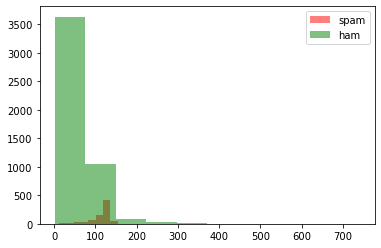

In [5]:
#plotting
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(dataset[dataset.label=="spam"].len_count,alpha=0.5,label="spam",color="red")
plt.hist(dataset[dataset.label=="ham"].len_count,alpha=0.5,label="ham",color="green")
plt.legend()
plt.show()
#this might lead to overfitting of data if we use this feature

In [6]:
#separation of variables 
X=dataset.messages
y=dataset.label

In [7]:
X.shape

(5572,)

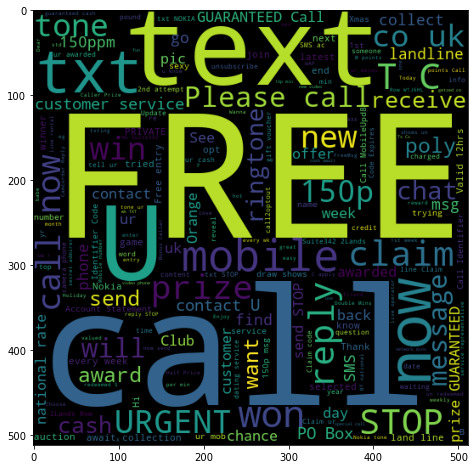

In [11]:
import wordcloud
spam_words=" ".join(list(dataset[dataset.label=="spam"]["messages"]))
spam_wordcloud=wordcloud.WordCloud(width=512,height=512).generate(spam_words)
plt.figure(figsize=(10,8))
plt.imshow(spam_wordcloud)
plt.show()

In [5]:
#one hot encoding
y=pd.get_dummies(y)
y

,ham,spam
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
5567,0,1
5568,1,0
5569,1,0
5570,1,0


In [6]:
y=y["spam"]

In [7]:
word=WordNetLemmatizer() #Initializing an instance for Wordnetlemmatizer

In [8]:
#this is the loop which remove the noise data from the dataset and lowers the letters along with removing stopwords and returns an array
array=[]
for i in range(len(X)):
    review=re.sub("[^a-zA-Z]"," ",X[i])
    review=review.lower()
    review=review.split()
    review=[word.lemmatize(words) for words in review if word not in set(stopwords.words("english"))]
    review=" ".join(review)
    array.append(review)


In [9]:
#Required libraries for processing the data
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
countvec=CountVectorizer()  
tf=TfidfVectorizer()

In [13]:
countvector=countvec.fit_transform(array).toarray()  #bag of words 

In [14]:
tfvector=tf.fit_transform(array).toarray() #tfidgf vector

In [15]:
#making our data for testing and training purpose 
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test=train_test_split(countvector,y,test_size=0.3,random_state=0)
X_train1,X_test1,y_train1,y_test1=train_test_split(tfvector,y,test_size=0.3,random_state=0)


In [16]:
#creation of 2 models for each type of vector
from sklearn.naive_bayes import MultinomialNB
model_one=MultinomialNB()
model_two=MultinomialNB()

In [ ]:
from sklearn.model_selection import GridSearchCV


In [17]:
#fitting 
model_one.fit(X_train,y_train)
model_two.fit(X_train1,y_train1)

MultinomialNB()

In [18]:
#predicting
mpred=model_one.predict(X_test)
mpred1=model_two.predict(X_test)

In [19]:
#confusion matrix
from sklearn.metrics import confusion_matrix
count_vec=confusion_matrix(y_test,mpred)
tf_vec=confusion_matrix(y_test,mpred1)

In [20]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


array([[1428,   23],
       [  12,  209]], dtype=int64)

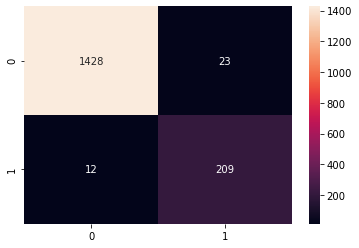

In [21]:
sns.heatmap(count_vec,annot=True,fmt="d")
count_vec


<AxesSubplot:>

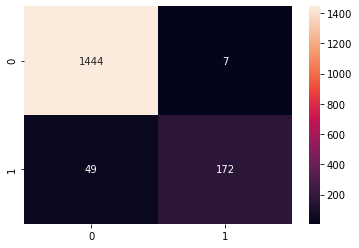

In [22]:
sns.heatmap(tf_vec,annot=True,fmt="d")

In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(y_test,mpred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1451
           1       0.90      0.95      0.92       221

    accuracy                           0.98      1672
   macro avg       0.95      0.96      0.96      1672
weighted avg       0.98      0.98      0.98      1672



In [25]:
print(classification_report(y_test1,mpred1)) 

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1451
           1       0.96      0.78      0.86       221

    accuracy                           0.97      1672
   macro avg       0.96      0.89      0.92      1672
weighted avg       0.97      0.97      0.96      1672



In [27]:
model_one.fit(countvector,y)#training the whole data with countvector because it has got some good classification values compared
                            #the tfidf vector

MultinomialNB()

In [28]:
import pickle #Pickling the models for external use 

In [45]:
filename = 'spam_cls.pkl'
pickle.dump(model_one, open(filename, 'wb'))

In [46]:
filename="vect_transform.pkl"
pickle.dump(countvec,open(filename,"wb"))